In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('Walmart_Sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [141]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Date']


0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [93]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [145]:
df_agrupado = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_agrupado
ax.plot(df_agrupado['Date'],df_agrupado['Weekly_Sales'])

In [146]:
df['meses']  = df['Date'].dt.to_period('M')

In [144]:
df_grouped = df.groupby('meses')['Weekly_Sales'].sum().reset_index()

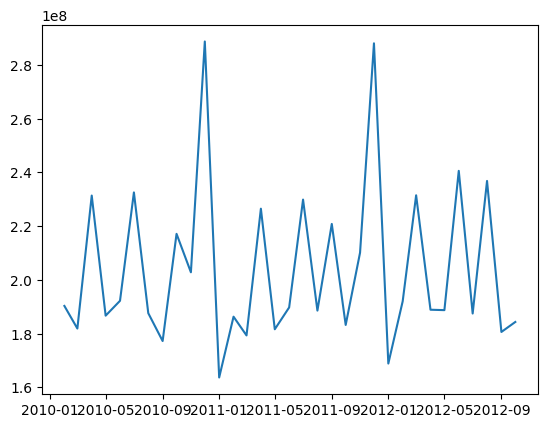

In [147]:
figure, ax = plt.subplots()
ax.plot(df_grouped['meses'].astype('datetime64[ns]'), df_grouped['Weekly_Sales'])



### ¿Acaso en feriados se vende más o menos ?

In [148]:
comparate_flags = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
comparate_flags

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [149]:
print(comparate_flags[1]-comparate_flags[0])

81631.51214670017


In [150]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000  


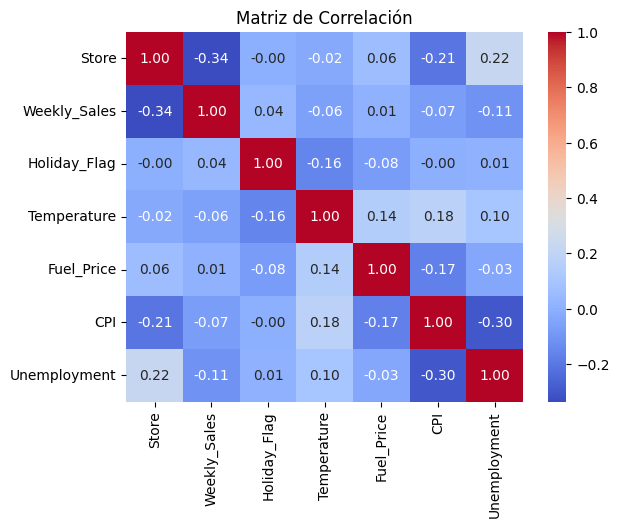

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Mapa de calor
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [119]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [152]:
import pandas as pd

# Agrupas por tienda y calculas promedios u otras métricas relevantes
store_features = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Holiday_Flag': 'sum',
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()


In [153]:
store_features

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1.555264e+06,10,68.306783,3.219699,215.996892,7.610420
1,2,1.925751e+06,10,68.216364,3.219699,215.646311,7.623846
2,3,4.027044e+05,10,71.434196,3.219699,219.391531,7.176986
3,4,2.094713e+06,10,62.253357,3.216972,128.679669,5.964692
4,5,3.180118e+05,10,69.410140,3.219699,216.565581,6.295406
5,6,1.564728e+06,10,69.700000,3.219699,217.553197,6.606902
6,7,5.706173e+05,10,39.720280,3.241559,193.664243,8.585734
7,8,9.087495e+05,10,62.513986,3.219699,219.439026,6.091846
8,9,5.439806e+05,10,67.775175,3.219699,219.626689,6.099881
9,10,1.899425e+06,10,72.241189,3.575923,128.679669,8.362965


In [121]:
from sklearn.preprocessing import StandardScaler

features = store_features.drop('Store', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


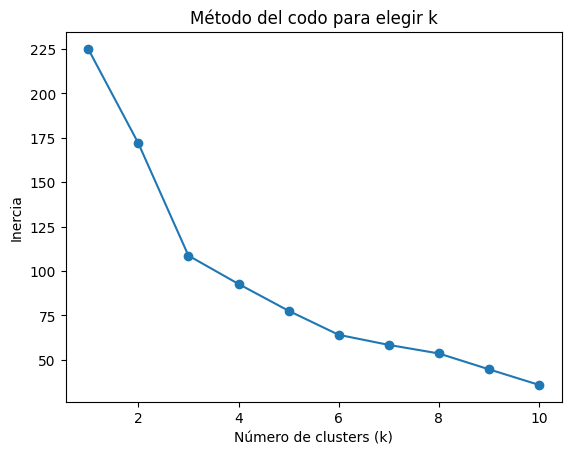

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para elegir k')
plt.show()


In [123]:
kmeans = KMeans(n_clusters=3, random_state=42)
store_features['Cluster'] = kmeans.fit_predict(scaled_features)


In [124]:
print(store_features[['Store', 'Cluster']])


    Store  Cluster
0       1        2
1       2        2
2       3        2
3       4        0
4       5        2
5       6        2
6       7        0
7       8        2
8       9        2
9      10        1
10     11        2
11     12        1
12     13        0
13     14        0
14     15        0
15     16        0
16     17        0
17     18        0
18     19        0
19     20        0
20     21        2
21     22        0
22     23        0
23     24        0
24     25        0
25     26        0
26     27        0
27     28        1
28     29        0
29     30        2
30     31        2
31     32        0
32     33        1
33     34        0
34     35        0
35     36        2
36     37        2
37     38        1
38     39        2
39     40        0
40     41        0
41     42        1
42     43        2
43     44        0
44     45        0


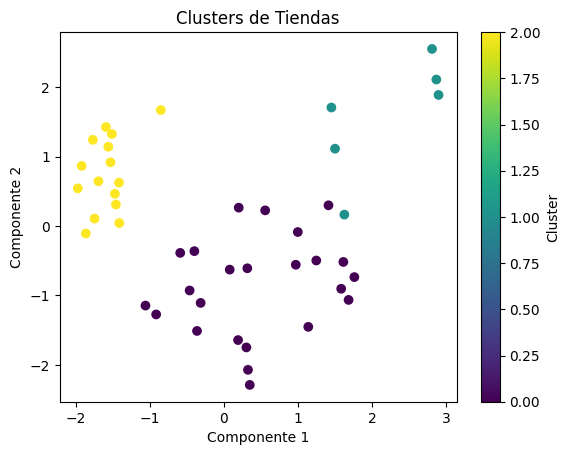

In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=store_features['Cluster'], cmap='viridis')
plt.title('Clusters de Tiendas')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Cluster')
plt.show()


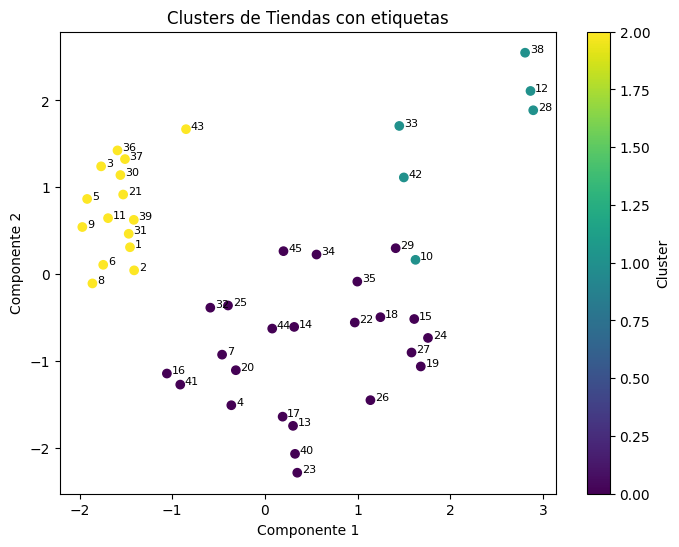

In [ ]:
# Suponiendo que tienes el PCA y los clusters ya calculados:
import matplotlib.pyplot as plt

# Agregar las componentes principales al dataframe
store_features['PCA1'] = pca_features[:, 0]
store_features['PCA2'] = pca_features[:, 1]
    
# Plot con etiquetas
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    store_features['PCA1'], 
    store_features['PCA2'], 
    c=store_features['Cluster'], 
    cmap='viridis'
)

# Agregar etiquetas de tiendas
for i, row in store_features.iterrows():
    plt.text(row['PCA1'] + 0.05, row['PCA2'], str(int(row['Store'])), fontsize=8)

plt.title('Clusters de Tiendas con etiquetas')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
